In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
import copy                               # for deep copies
from sklearn.neighbors import NearestNeighbors # nearest neighbours function to calculate eps hyperparameter
from sklearn.preprocessing import MinMaxScaler # min/max normalization
from sklearn.cluster import KMeans        # k-means clustering
from sklearn.cluster import DBSCAN        # DBSCAN clustering
from sklearn.cluster import SpectralClustering # spectral clustering
cmap = plt.cm.inferno

In [2]:
os.chdir(r"C:\Users\sures\Desktop\ML for NCCC")    

In [6]:
df = pd.read_csv('Clustering error data.csv')

In [9]:
df.head()
df.describe()

,SLNO,Error,rldg
count,115.000000,115.000000,115.000000
mean,58.000000,0.938382,0.397234
std,33.341666,0.093261,0.011371
min,1.000000,0.685117,0.363606
25%,29.500000,0.900073,0.391324
50%,58.000000,0.957099,0.401102
75%,86.500000,0.983251,0.404899
max,115.000000,1.127012,0.412405


In [12]:
#min max scaling of features

transform = MinMaxScaler()
features = ['Error','rldg']

df['n' + features[0]] = transform.fit_transform(df.loc[:,features].values)[:,0]

df['n' + features[1]] = transform.fit_transform(df.loc[:,features].values)[:,1]

df



,SLNO,Error,rldg,nError,nrldg
0,1,0.854602,0.391323,0.383542,0.567985
1,2,0.821806,0.412395,0.309325,0.999791
2,3,0.875216,0.409354,0.430190,0.937475
3,4,0.845302,0.409862,0.362495,0.947882
4,5,0.901012,0.409207,0.488566,0.934449
5,6,0.848599,0.407003,0.369957,0.889291
6,7,0.791408,0.401872,0.240534,0.784139
7,8,0.733878,0.401721,0.110344,0.781052
8,9,0.768171,0.398755,0.187950,0.720266
9,10,0.685117,0.396025,0.000000,0.664320


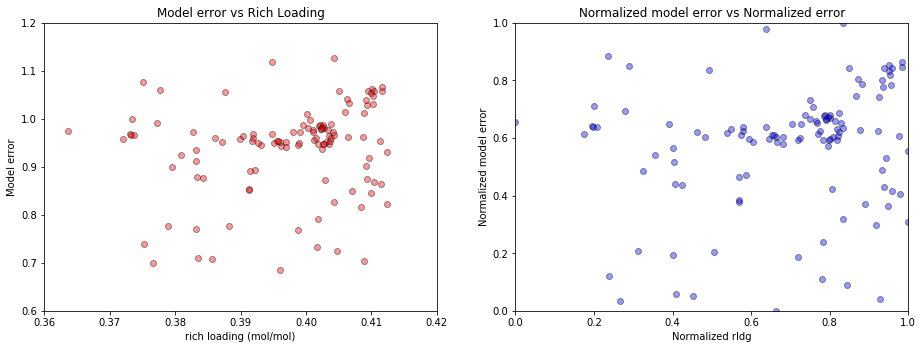

In [19]:
#scatter plot training data

#without normalized data
plt.subplot(121)
plt.scatter(df['rldg'], df['Error'], c="red", alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Model error vs Rich Loading'); plt.xlabel('rich loading (mol/mol)'); plt.ylabel('Model error')
plt.xlim(0.36,0.42)
plt.ylim(0.6,1.2)

#with normalized data
plt.subplot(122)
plt.scatter(df['nrldg'], df['nError'], c="blue", alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Normalized model error vs Normalized error'); plt.xlabel('Normalized rldg'); plt.ylabel('Normalized model error')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

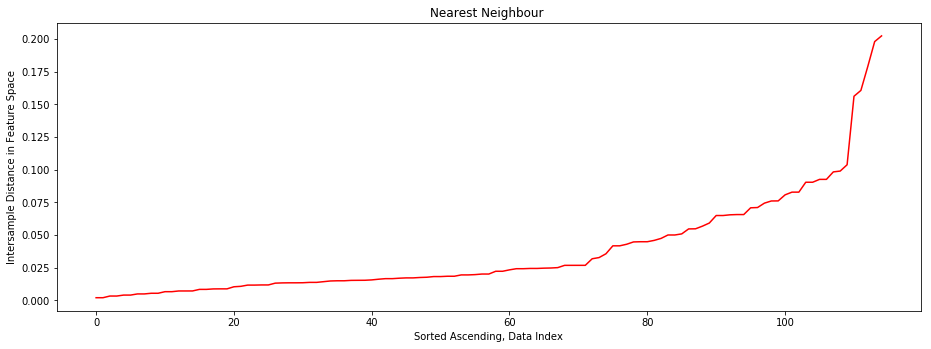

In [71]:
#nearest neighbors plot    #Credit to Dr. Michael Pyrcz - UT Austin PGE - www.github.com/GeostatsGuy
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['nError','nrldg']].values)
distances, indices = nbrs.kneighbors(df[['nError','nrldg']].values)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances, c = 'red'); plt.xlabel('Sorted Ascending, Data Index'); plt.ylabel('Intersample Distance in Feature Space')
plt.title('Nearest Neighbour ')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.00, wspace=0.2, hspace=0.2)

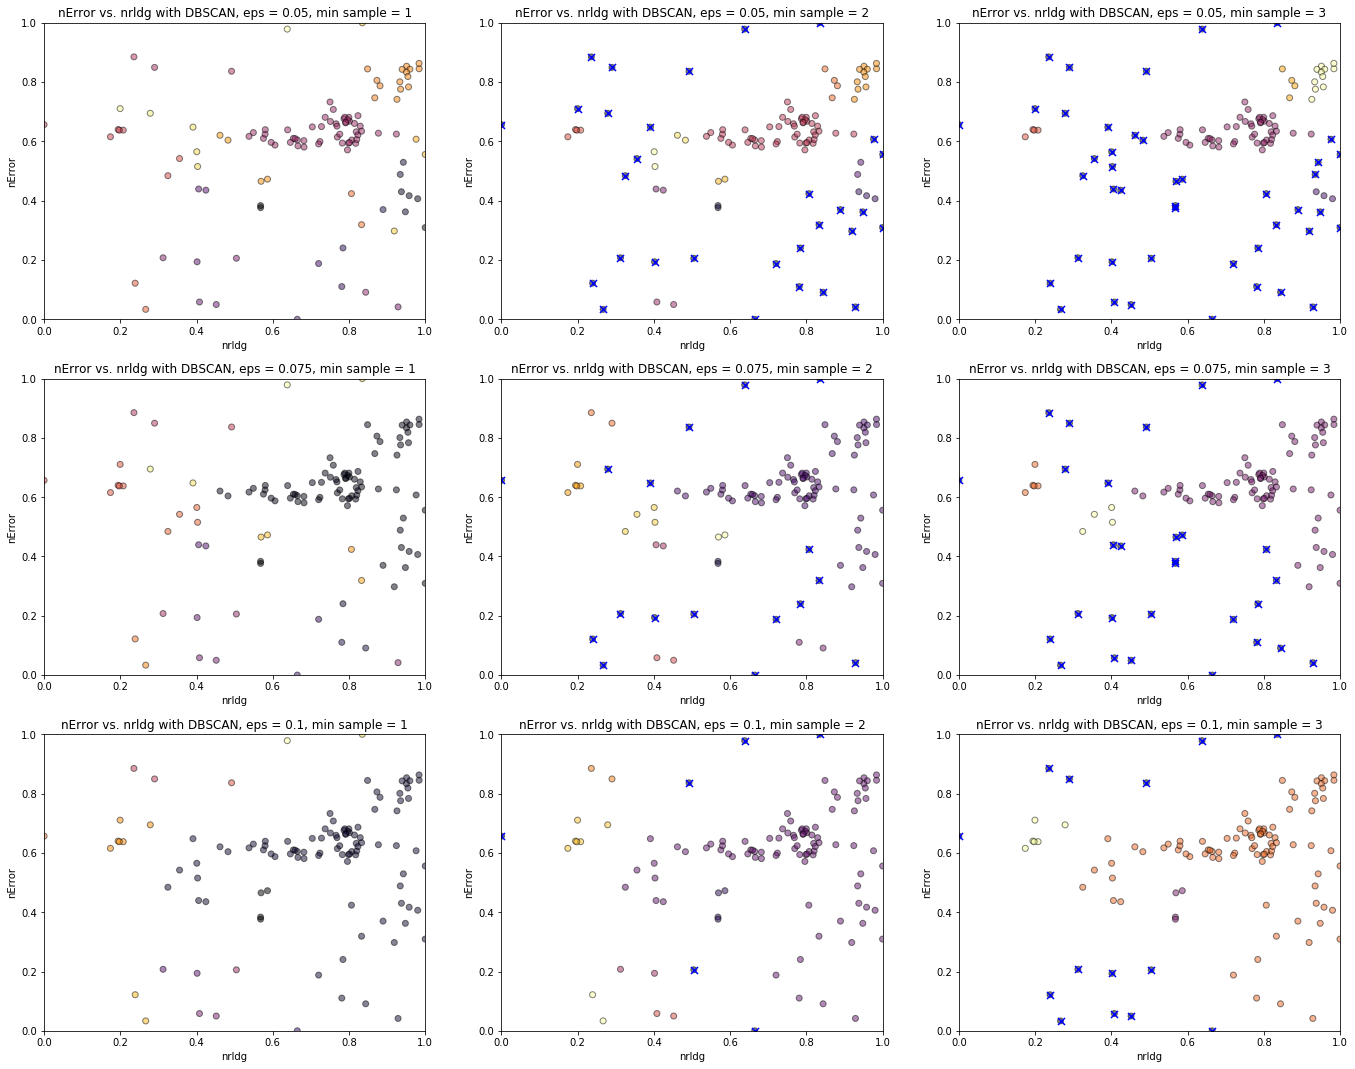

In [75]:
#checking optimal values of eps and nmin, #Credit to Dr. Michael Pyrcz - UT Austin PGE - www.github.com/GeostatsGuy

eps_mat = [0.05,0.075,0.1] 
min_sample_mat = [1, 2, 3]

index = 1
for eps in eps_mat:
    for min_sample in min_sample_mat:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit(df[['nError','nrldg']].values)
        df['DBSCAN'] = dbscan.labels_ + 1
        plt.subplot(3,3,index)                          # plot the assigned training data and K prototypes
        df_in = df.loc[(df['DBSCAN'] != 0)]
        plt.scatter(df['nrldg'], df['nError'], c=df['DBSCAN'], alpha=0.5, edgecolor='k', cmap = cmap)
        df_outlier = df.loc[(df['DBSCAN'] == 0)]
        plt.scatter(df_outlier['nrldg'],df_outlier['nError'],c='blue',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
        plt.title('nError vs. nrldg with DBSCAN' + ', eps = ' + str(eps) + ', min sample = ' + str(min_sample)); plt.xlabel('nrldg'); plt.ylabel('nError')
        plt.xlim(0,1)
        plt.ylim(0,1)
        index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.50, wspace=0.2, hspace=0.2)

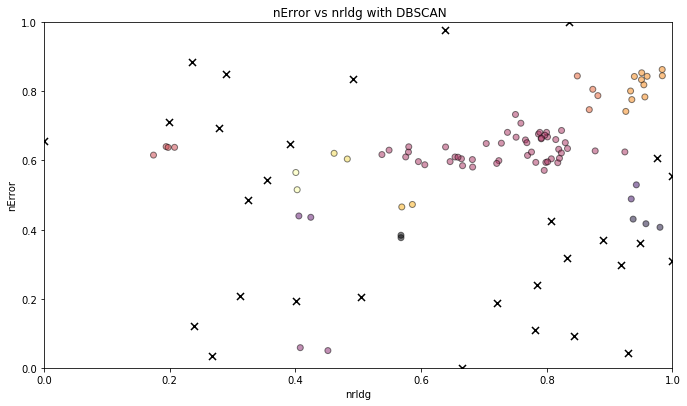

In [76]:
#DBSCAN -  #Credit to Dr. Michael Pyrcz - UT Austin PGE - www.github.com/GeostatsGuy
dbscan = DBSCAN(eps=0.05, min_samples=2).fit(df[['nError','nrldg']].values)
df['DBSCAN'] = dbscan.labels_ + 1

cmap = plt.cm.inferno

plt.subplot(121)                          # plot the assigned training data and K prototypes
df_in = df.loc[(df['DBSCAN'] != 0)]
plt.scatter(df_in['nrldg'], df_in['nError'], c=df_in['DBSCAN'], alpha=0.5, edgecolor='k', cmap = cmap)
df_outlier = df.loc[(df['DBSCAN'] == 0)]
plt.scatter(df_outlier['nrldg'],df_outlier['nError'],c='black',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title(' nError vs nrldg with DBSCAN'); plt.xlabel('nrldg'); plt.ylabel('nError')
plt.xlim(0,1)
plt.ylim(0,1)


plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2)




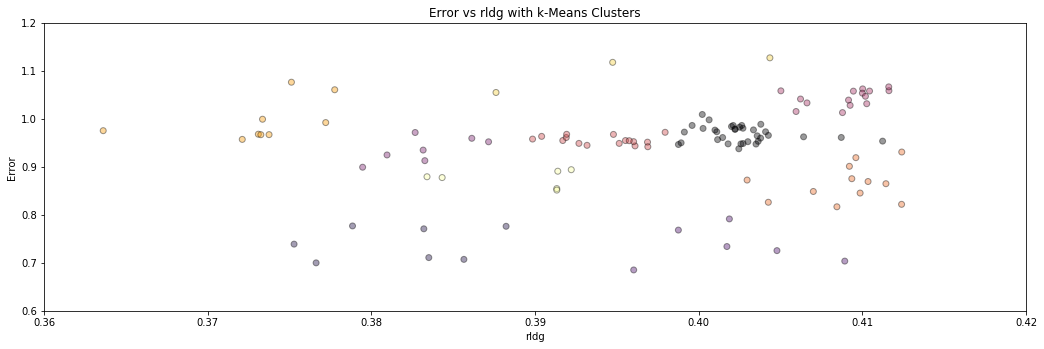

In [63]:
#Trying out k-means clustering   #Credit to Dr. Michael Pyrcz - UT Austin PGE - www.github.com/GeostatsGuy

kmeans_orig = KMeans(n_clusters=10, random_state=0).fit(df[['nError','nrldg']].values)
df['kMeans_orig'] = kmeans_orig.labels_ + 1

#plt.subplot(121)                          # plot the assigned training data and K prototypes
#plt.scatter(df['nrldg'], df['nError'], c=df['kMeans_orig'],alpha=0.5, edgecolor='k', cmap = cmap)
#plt.title('nError vs. nrldg with k-Means Clusters'); plt.xlabel('nrldg'); plt.ylabel('nError')
#plt.xlim(0,1)
#plt.ylim(0,1)

plt.subplot(122)                          # plot the training data and K prototypes
plt.scatter(df['rldg'], df['Error'], c=df['kMeans_orig'], alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black", cmap = cmap)
plt.title('Error vs rldg with k-Means Clusters'); plt.xlabel('rldg'); plt.ylabel('Error')
plt.xlim(0.36, 0.42)
plt.ylim(0.6, 1.2)

plt.subplots_adjust(left=0.0, bottom=0.0, right=5, top=1, wspace=0.2, hspace=0.2)



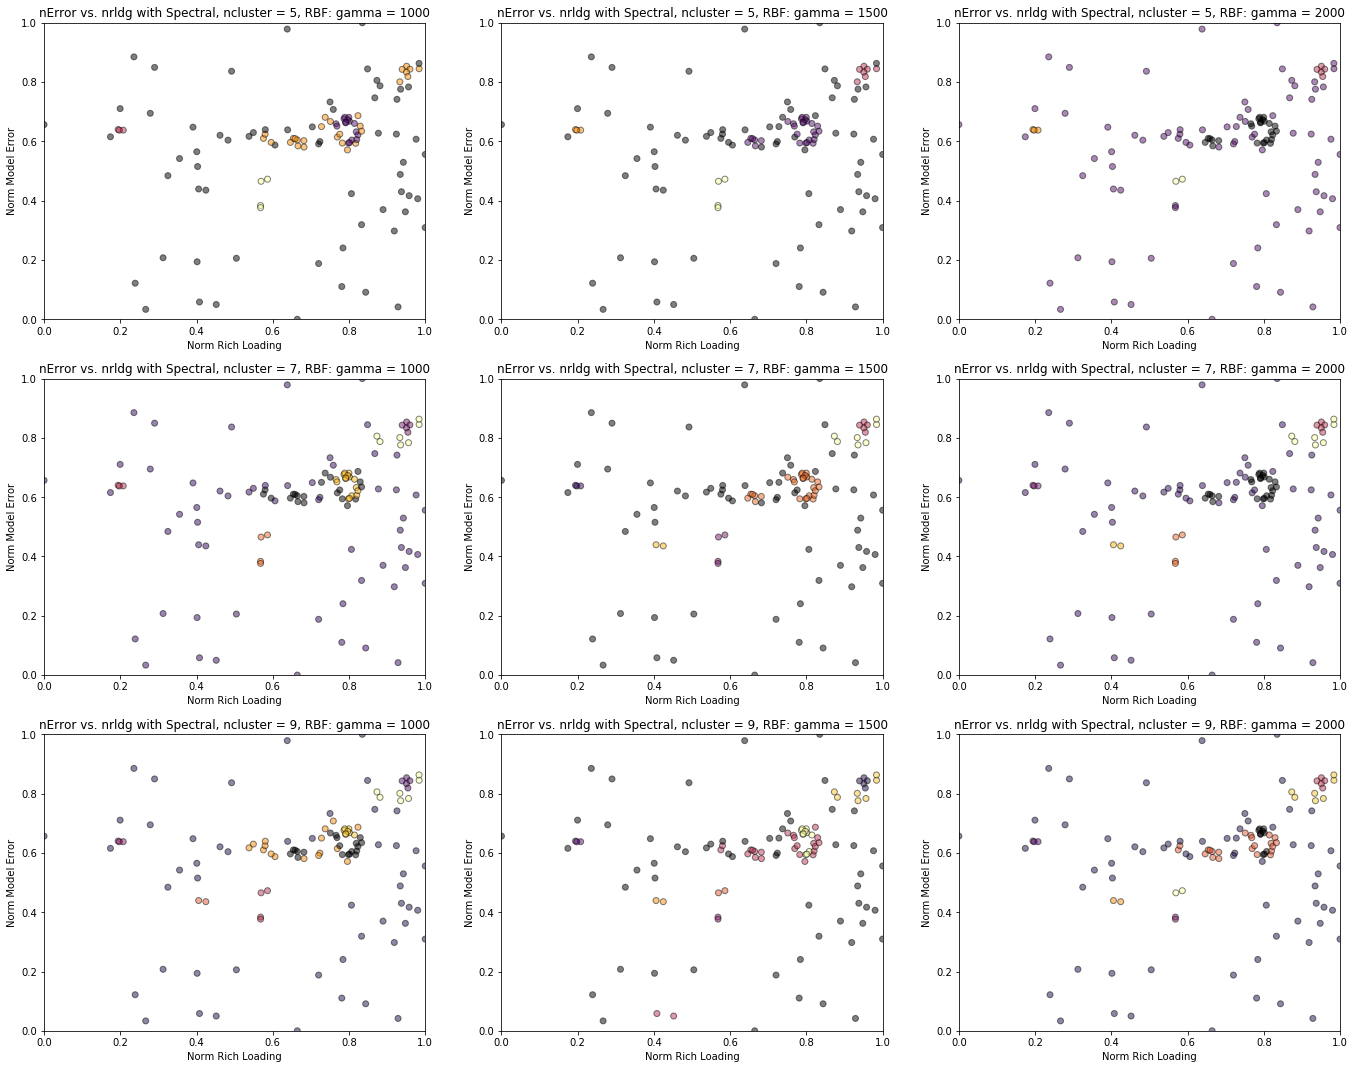

In [50]:
# trying out Spectral Clustering, #Credit to Dr. Michael Pyrcz - UT Austin PGE -  www.github.com/GeostatsGuy

#OPTIMIZING HYPERPARAMETERS FOR SPECTRAL CLUSTERING

ncluster_mat = [5,7,9] 
gamma_mat = [1000,1500,2000]

index = 1
for ncluster in ncluster_mat:
    for gamma in gamma_mat:
        spectral = SpectralClustering(n_clusters=ncluster,assign_labels="kmeans",affinity = 'rbf',
                              gamma = gamma,n_neighbors = 200,random_state=230).fit(df[['nError','nrldg']].values)
        df['SPECTRAL'] = spectral.labels_ + 1
        
        plt.subplot(3,3,index)                          # plot the assigned training data and K prototypes
        plt.scatter(df['nrldg'],df['nError'], c=df['SPECTRAL'], alpha=0.5, edgecolor='k', cmap = cmap)
        plt.title('nError vs. nrldg' + ' with Spectral, ncluster = ' + str(ncluster) + ', RBF: gamma = ' + str(gamma)); plt.xlabel('Norm Rich Loading'); plt.ylabel('Norm Model Error')
        plt.xlim(0,1)
        plt.ylim(0,1)
        index = index + 1

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.50, wspace=0.2, hspace=0.2)

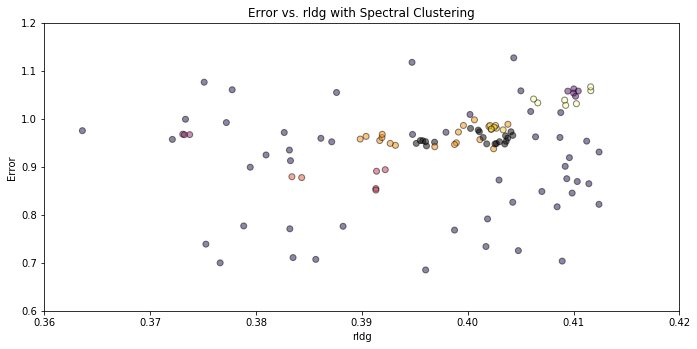

In [55]:
# SPECTRAL CLUSTERING  www.github.com/GeostatsGuy

spectral = SpectralClustering(n_clusters=9,assign_labels="kmeans",affinity = 'rbf',
                              gamma = 1000,n_neighbors = 200,random_state=230).fit(df[['nError','nrldg']].values)
df['SPECTRAL'] = spectral.labels_ + 1

cmap = plt.cm.inferno

plt.subplot(131)                          # plot the assigned training data and K prototypes

plt.scatter(df['rldg'],df['Error'], c=df['SPECTRAL'], alpha=0.5, edgecolor='k', cmap = cmap)
plt.title('Error vs. rldg with Spectral Clustering'); plt.xlabel('rldg'); plt.ylabel('Error')
plt.xlim(.36,.42)
plt.ylim(0.6,1.2)

#plt.subplot(132)                          # plot the training data and K prototypes
#plt.scatter(df['n' + col[0]], df['n' + col[1]], c=df['SPECTRAL'], alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black", cmap = cmap)
#plt.title('Normalized ' + col[1] + ' vs. ' + col[0] + ' Spectral Clustering'); plt.xlabel(xlabel + ' (normalized)'); plt.ylabel(ylabel + ' (normalized)')
#plt.xlim(0, 1)
#plt.ylim(0, 1)

plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=1.0, wspace=0.2, hspace=0.2)